In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.json._normalize import nested_to_record

%matplotlib inline

## gather data df

In [2]:
sample_name = "data/num_train_samples"
metric_name = "test/roc_auc"
temporal_metric_name = "test/temporal_roc_auc"
loss_name = "test/loss"
temporal_loss_name = "test/temporal_loss"
pretrained_names = [
    "nyutron (ours, clinical)",
    "web-wiki+bio+clinical",
    "web-wiki+bio",
    "web-wiki",
    "random-init",
    "lace+xgb",
]
keep_cols = [sample_name, metric_name, temporal_metric_name, "pretrained", "data_type"]

## Plot combined dfs

In [3]:
plot_df = pd.read_csv("./raw_data/3b_plot.csv", index_col=0)
plot_df

,data/num_train_samples,test/roc_auc,test/temporal_roc_auc,pretrained,data_type
107,362259,0.840226,0.798681,"nyutron (ours, clinical)",unstructured
104,100,0.691714,0.678432,"nyutron (ours, clinical)",unstructured
105,362259,0.841336,0.802037,"nyutron (ours, clinical)",unstructured
106,362259,0.839215,0.797849,"nyutron (ours, clinical)",unstructured
108,362259,0.838727,0.799166,"nyutron (ours, clinical)",unstructured
...,...,...,...,...,...
130,100000,0.756404,0.744437,lace+xgb,structured
129,362259,0.757390,0.745123,lace+xgb,structured
152,1000,0.729370,0.719476,lace+xgb,structured
140,10000,0.749651,0.738868,lace+xgb,structured


In [4]:
plot_df["pretrained"] = pd.Categorical(
    plot_df["pretrained"], categories=pretrained_names, ordered=True
)
plot_df = plot_df.sort_values(by="pretrained")
print(plot_df[plot_df["pretrained"] == "random-init"][["pretrained", "data_type"]])

      pretrained     data_type
86   random-init  unstructured
50   random-init  unstructured
81   random-init  unstructured
54   random-init  unstructured
90   random-init  unstructured
46   random-init  unstructured
42   random-init  unstructured
94   random-init  unstructured
38   random-init  unstructured
98   random-init  unstructured
78   random-init  unstructured
102  random-init  unstructured
74   random-init  unstructured
14   random-init  unstructured
66   random-init  unstructured
58   random-init  unstructured
34   random-init  unstructured
103  random-init  unstructured
30   random-init  unstructured
62   random-init  unstructured
18   random-init  unstructured
26   random-init  unstructured
6    random-init  unstructured
10   random-init  unstructured
23   random-init  unstructured
70   random-init  unstructured


Based on https://stackoverflow.com/questions/67371411/how-to-do-a-boxplot-with-individual-data-points-using-seaborn

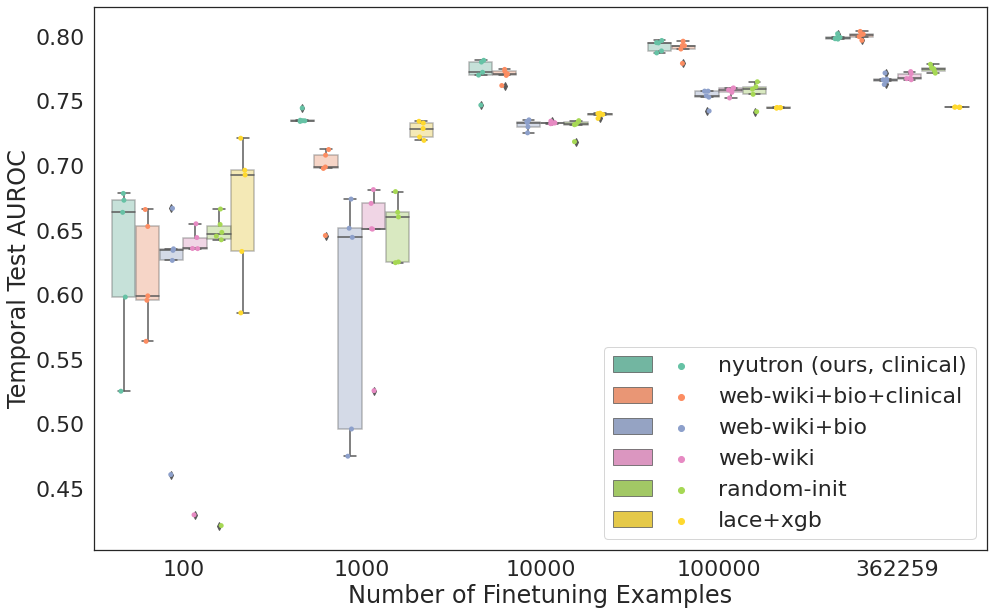

In [6]:
from matplotlib.legend_handler import HandlerTuple

plt.figure(figsize=(16, 10))
sns.set(style="white", font_scale=2)
ax = sns.boxplot(
    data=plot_df,
    x=sample_name,
    y=temporal_metric_name,
    hue="pretrained",
    boxprops={"alpha": 0.4},
    palette=sns.color_palette("Set2", 6),
)
sns.stripplot(
    data=plot_df,
    x=sample_name,
    y=temporal_metric_name,
    hue="pretrained",
    dodge=True,
    ax=ax,
    palette=sns.color_palette("Set2", 6),
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=[(handles[idx], handles[idx + 6]) for idx in range(6)],
    labels=labels[:6],
    loc="lower right",
    handlelength=4,
    handler_map={tuple: HandlerTuple(ndivide=None)},
)
plt.xlabel("Number of Finetuning Examples")
plt.ylabel("Temporal Test AUROC")
plt.savefig("AIP_plots/ext_3a.png", bbox_inches="tight", dpi=300)